In [6]:
%matplotlib inline
import numpy as np
import os
import pandas as pd
import warnings;
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
## Plotting settings
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import ticker as mticker
import seaborn as sns
mpl.rc('text', usetex = True)
mpl.rc('font', family = 'serif')

TITLE_SIZE = 45
LABEL_SIZE = 40
LEGEND_TITLE_SIZE = 35
LEGEND_SIZE = 30
TICK_SIZE = 30

FONT = 'serif'
params = {}
params['legend.title_fontsize'] = LEGEND_TITLE_SIZE
params['axes.labelsize'] = LABEL_SIZE
params['axes.titlesize'] = TITLE_SIZE
params['legend.fontsize'] = LEGEND_SIZE
params['xtick.labelsize']= TICK_SIZE
params['ytick.labelsize'] = TICK_SIZE
params["font.family"] = "Times New Roman"
context = sns.plotting_context("paper", rc=params)
sns.set_theme(style="whitegrid", font=FONT)

In [4]:
def plot_popularity_availability_bias(plot_df, ax, title = '', ymin = -7,  ylabel = r'Average item $\rho$',count='k'):
    beta = 2
    ylim = [5*10**ymin, 0.9]
    plot_df['log_access'] = np.log10(plot_df['access'])
    p = sns.violinplot(x="avg_rating_q", y="log_access", hue='access_type', data=plot_df[plot_df['beta']==beta],
                  alpha=0.5, s=5, dodge=True, palette = 'deep', ax = ax, bw = 0.2)
    p.set(xlabel="Average item rating", ylabel= ylabel,
         title = title)
    ax.yaxis.set_major_formatter(mticker.StrMethodFormatter("$10^{{{x:.0f}}}$"))
    ax.yaxis.set_ticks([np.log10(x) for q in range(ymin, 0) for x in np.linspace(10**q, 10**(q+1), 10)], minor=True)
    ax.get_legend().set_title("")
    return p

def plot_gender_availability_bias(plot_df, ax, title = '', ymin = -7,  ylabel = r'Average item $\rho$', count='k'): 
    beta = 2
    ylim = [5*10**ymin, 0.9]
    p = sns.violinplot(x="strict_gender", y="log_access", hue='access_type', data=plot_df[plot_df['beta']==beta],
                  alpha=0.5, s=5, dodge=True, palette = 'deep', ax = ax, bw = 0.2)
    p.set(xlabel="Artist gender", ylabel= ylabel,
         title = title)
    ax.yaxis.set_major_formatter(mticker.StrMethodFormatter("$10^{{{x:.0f}}}$"))
    ax.yaxis.set_ticks([np.log10(x) for q in range(ymin, 0) for x in np.linspace(10**q, 10**(q+1), 10)], minor=True)
    ax.get_legend().set_title("")
    return p
    
def plot_experience_discovery_bias(plot_df, ax, title = '', ymin = -6, count='k'):
    beta = 2
    ylim = [5*10**ymin, 1]
    p = sns.violinplot(x="num_rating_q", y="access", hue='access_type', data=plot_df[plot_df['beta']==beta].dropna(),
                  alpha=0.5, s=5, dodge=True, palette = 'deep', ax = ax, cut = 0, bw = 0.2)
    p.set(xlabel="Number of total ratings", ylabel= r'\% of items with above random $\rho^\star$',
         title = title)
    ax.get_legend().set_title("")
    return p

def plot_gender_discovery_bias(plot_df, ax, title = '', ymin = -6, count='k'):
    beta = 2
    ylim = [5*10**ymin, 1]
    p = sns.violinplot(x="gender", y="access", hue='access_type', data=plot_df[plot_df['beta']==beta].dropna(),
                  order=["F", "M"], alpha=0.5, s=5, dodge=True, palette = 'deep', ax = ax, cut = 0, bw = 0.2)
    p.set(xlabel="User gender", ylabel= r'\% of items with above random $\rho^\star$',
         title = title)
    ax.get_legend().set_title("")
    return p

# Availability

In this section we compare item availability of the `MovieLens 1 Million` dataset for the Matrix Factorization based recommender: `LibFM` and the neighborhood based recommender: `KNN`.

In both cases we assume that the action space consists of `10 action items` and the item selection probabilities are parametrized by $\beta = 2$.

Recall that availability of an item $A_i$ is computed as the average of the reachability associated with the item (averaged over users for which the item is a valid target item (non-action and previously unseen items))

$$A_i =\frac{\sum_u\rho_{u,i}\mathbb{1}\{i \in \Omega^t_u\}}{\sum_u\mathbb{1}\{i \in \Omega^t_u\}}$$

We further compare the availability for 3 types of user action spaces:
- `Next-K`: the action items are the 10 items rated highest by the recommender
- `Random-Future`: a random subset of the unseen items
- `Random-History`: a random subset of the previously seen items

## ML-1M dataset with LibFM recommender,  `action_count=10`, $\beta$=2
### Load the Next-K; Random History and Random Future experiments on ML-1M dataset with LibFM

In [7]:
ml1m_libfm_nextk_availability_df = pd.read_csv(os.path.join('results', 'ml1m_libfm_nextk_availability.csv'))
ml1m_libfm_history_availability_df = pd.read_csv(os.path.join('results', 'ml1m_libfm_history_availability.csv'))
ml1m_libfm_future_availability_df = pd.read_csv(os.path.join('results', 'ml1m_libfm_future_availability.csv'))

## ML-1M with KNN recommender, `action_count=10`, $\beta$=2
### Load the Next-K; Random History and Random Future experiments on ML-1M dataset with KNN

In [12]:
ml1m_knn_nextk_availability_df = pd.read_csv(os.path.join('results', 'ml1m_knn_nextk_availability.csv'))
ml1m_knn_history_availability_df = pd.read_csv(os.path.join('results', 'ml1m_knn_history_availability.csv'))
ml1m_knn_future_availability_df = pd.read_csv(os.path.join('results', 'ml1m_knn_future_availability.csv'))

## Plot Item Availability comparison between LibFM and KNN for Next-K Action Space
The plots are split into 4 buckets depending on the average historical ratings of the items.

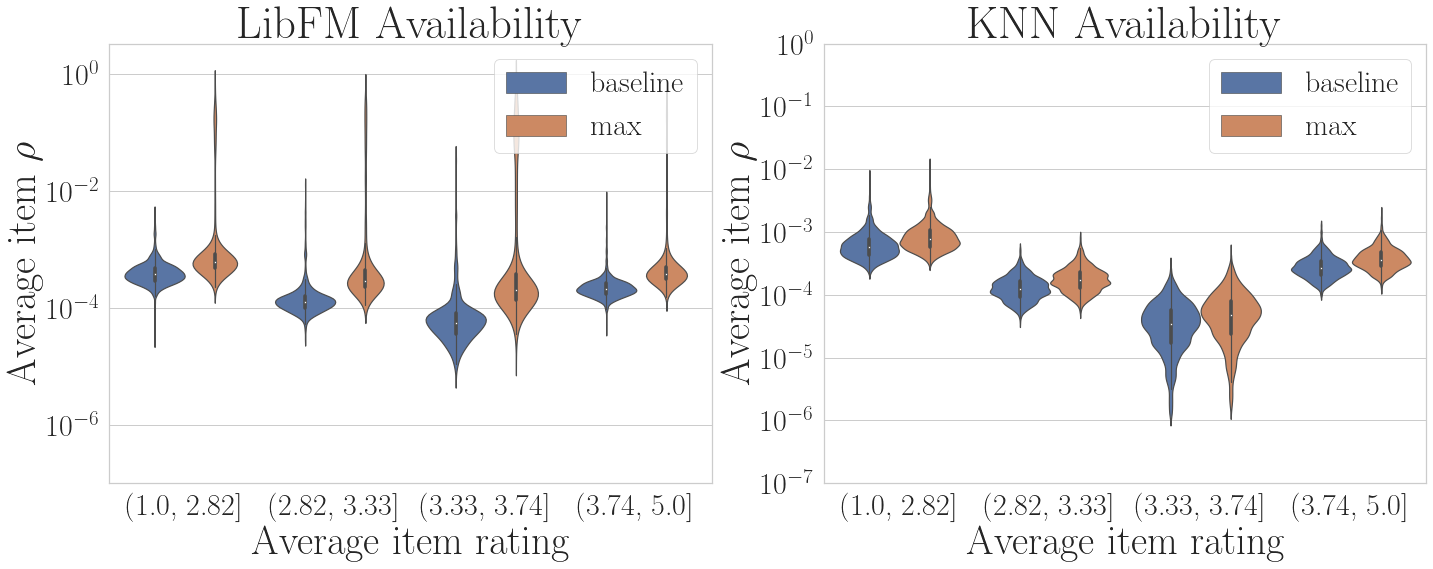

In [9]:
fig, axs = plt.subplots(1,2, figsize=(20,8), sharey=False)
with context:
    p1=plot_popularity_availability_bias(ml1m_libfm_nextk_availability_df, axs[0], title='LibFM Availability',)
    p2=plot_popularity_availability_bias(ml1m_knn_nextk_availability_df , axs[1], title='KNN Availability')
    for i in [0,1]:
        axs[i].xaxis.label.set_size(LABEL_SIZE)
        axs[i].yaxis.label.set_size(LABEL_SIZE)
        for t in axs[i].get_xticklabels():    #get_xticklabels will get you the label objects, same for y
            t.set_fontsize(TICK_SIZE)
        for t in axs[i].get_yticklabels():    #get_xticklabels will get you the label objects, same for y
            t.set_fontsize(TICK_SIZE)

    tick_labels = ['(1.0, 2.82]', '(2.82, 3.33]', '(3.33, 3.74]', '(3.74, 5.0]']
    p1.set_xticklabels(tick_labels)
    p2.set_xticklabels(tick_labels)
    plt.tight_layout()
    plt.show()

In [9]:
# fig.savefig('ml1m_access.pdf', dpi = 100)

### Repeat for Random Future and Random History

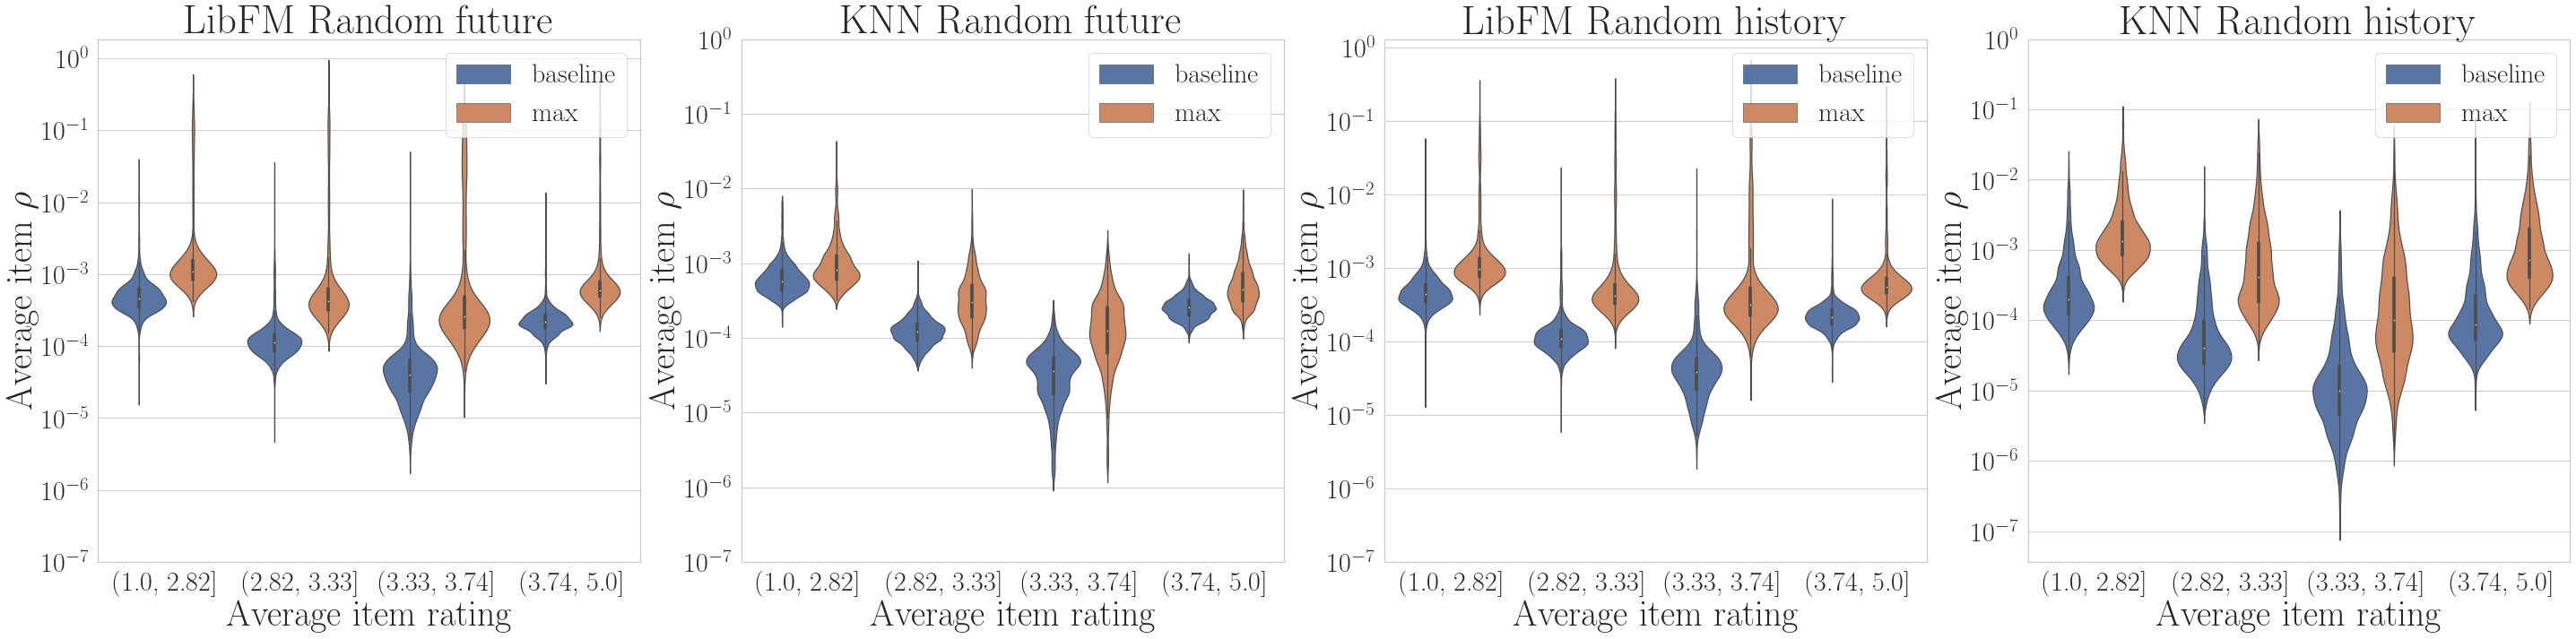

In [11]:
fig, axs = plt.subplots(1,4, figsize=(40,10), sharey=False)
with context:
    p1=plot_popularity_availability_bias(ml1m_libfm_future_availability_df , axs[0], 
                                         title='LibFM Random future',count='action_count')
    p2=plot_popularity_availability_bias(ml1m_knn_future_availability_df, axs[1], 
                                         title='KNN Random future', count='action_count')    
    p3=plot_popularity_availability_bias(ml1m_libfm_history_availability_df, axs[2], 
                                         title='LibFM Random history',count='action_count')
    p4=plot_popularity_availability_bias(ml1m_knn_history_availability_df, axs[3], title='KNN Random history',
                                        count='action_count')
    for i in [0,1, 2, 3]:
        axs[i].xaxis.label.set_size(LABEL_SIZE)
        axs[i].yaxis.label.set_size(LABEL_SIZE)
        for t in axs[i].get_xticklabels():    #get_xticklabels will get you the label objects, same for y
            t.set_fontsize(TICK_SIZE)
        for t in axs[i].get_yticklabels():    #get_xticklabels will get you the label objects, same for y
            t.set_fontsize(TICK_SIZE)
    tick_labels = ['(1.0, 2.82]', '(2.82, 3.33]', '(3.33, 3.74]', '(3.74, 5.0]']
    p1.set_xticklabels(tick_labels)
    p2.set_xticklabels(tick_labels)
    p3.set_xticklabels(tick_labels)
    p4.set_xticklabels(tick_labels)
    plt.tight_layout()
    plt.show()

In [ ]:
# fig.savefig('ml1m_access_app.pdf', dpi = 200)

# Discovery

In this section we look at user-centric metric:`Discovery`. A user $u$ is said to have higher than average discovery of an item $i$, if the probability that item $i$ is recommended is larger than $1/\#(\text{available target items})$. Therefore we define $D_u$ as the proportion of items for which the user $u$ has a higher than random chance of recommendation. 

Under the baseline if the recommender is close to uniformly random, then discovery is at 50\%, whereas if the recommender is close to deterministic, discovery is $1/\#(\text{available target items})$. 

$$D_u = \frac{\sum_{i\in\Omega_u^t} \mathbb{1}\{\rho_{ui}> \rho_0\}}{|\Omega_u^t|}$$

Under the 'max'-reachability analysis ($\rho_{u,i} = \rho^{\star}_{u,i}$) and the average discovery ability of a user can be above 50\%.

## Comparing Discovery accross genders for various choices of Action Space
Here we consider `action_count = 10` and $\beta = 2$ and the `LibFM` recommender models applied to the `ML-1M` dataset.

### Loading gender discovery data

In [13]:
ml1m_libfm_nextk_gender_discovery_df = pd.read_csv(os.path.join('results', 'ml1m_libfm_nextk_gender_discovery.csv'))
ml1m_libfm_history_gender_discovery_df = pd.read_csv(os.path.join('results', 'ml1m_libfm_history_gender_discovery.csv'))
ml1m_libfm_future_gender_discovery_df = pd.read_csv(os.path.join('results', 'ml1m_libfm_future_gender_discovery.csv'))

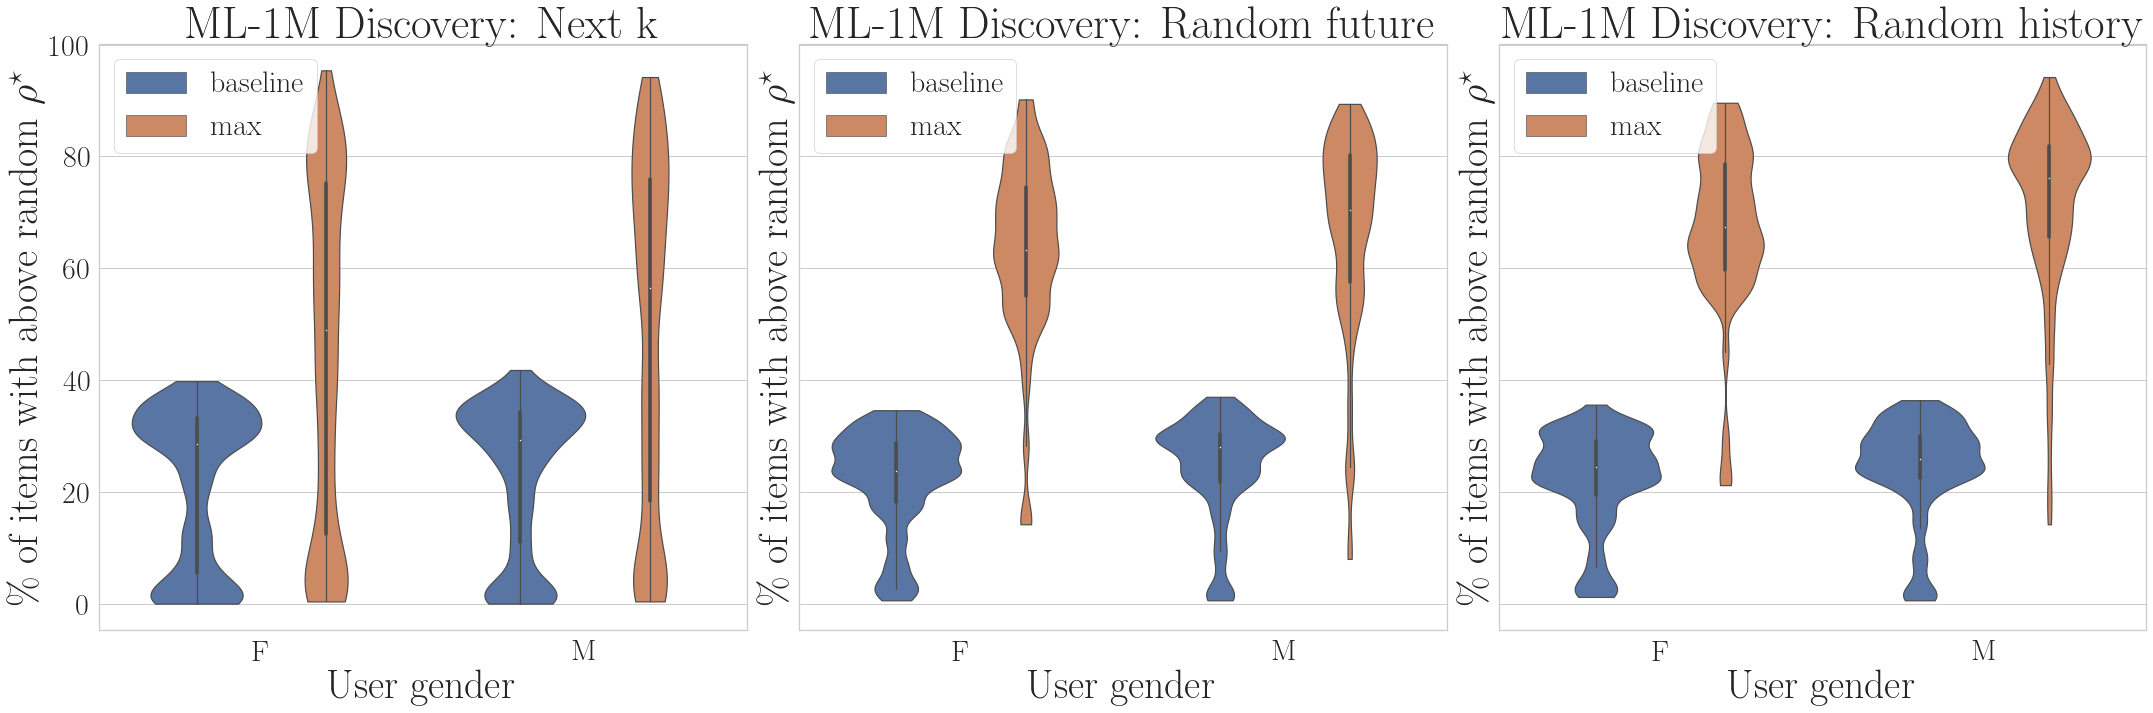

In [14]:
fig, axs = plt.subplots(1,3, figsize=(30,10), sharey=True)
with context:
    p0=plot_gender_discovery_bias(ml1m_libfm_nextk_gender_discovery_df, axs[0], 
                                  title='ML-1M Discovery: Next k', count='k')
    p1=plot_gender_discovery_bias(ml1m_libfm_future_gender_discovery_df, axs[1], 
                                  title='ML-1M Discovery: Random future', count='action_count')
    p2=plot_gender_discovery_bias(ml1m_libfm_history_gender_discovery_df, axs[2], 
                                  title='ML-1M Discovery: Random history', count='action_count')
    for i in [0,1, 2]:
        axs[i].xaxis.label.set_size(LABEL_SIZE)
        axs[i].yaxis.label.set_size(LABEL_SIZE)
        for t in axs[i].get_xticklabels():
            t.set_fontsize(TICK_SIZE)
        for t in axs[i].get_yticklabels():
            t.set_fontsize(TICK_SIZE)
    plt.tight_layout()
    plt.show()

In [ ]:
# fig.savefig('ml1m_gender_discovery.pdf', dpi = 100)

## Plot discovery comparison for two datasets `ML-1M` and `MIND`
Here we consider `action_count = 10` and $\beta = 2$ and the `LibFM` recommender models using the `Next-K` action space. We further split users in terms of the length of their interaction histrory with the system.

### Load discovery data stratified by experience

In [18]:
ml1m_libfm_nextk_experience_discovery_df = pd.read_csv(os.path.join('results', 
                                                                    'ml1m_libfm_nextk_experience_discovery.csv'))
mind_libfm_nextk_experience_discovery_df = pd.read_csv(os.path.join('results', 
                                                                    'mind_libfm_nextk_experience_discovery.csv'))

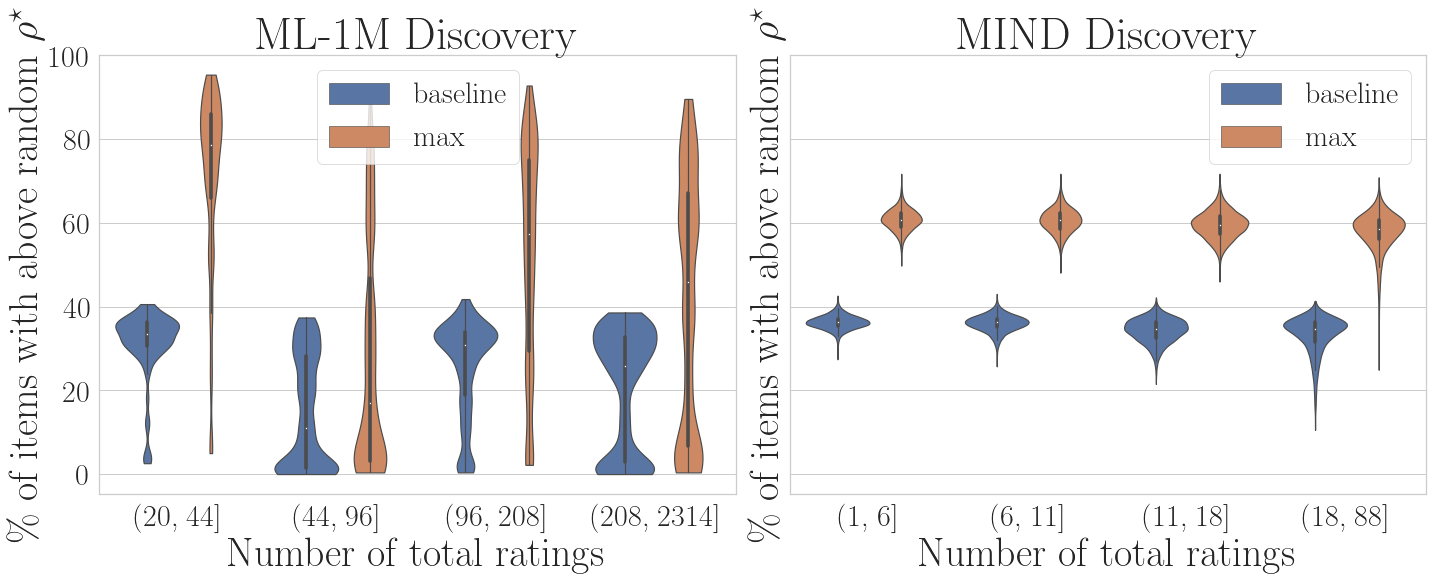

In [19]:
fig, axs = plt.subplots(1,2, figsize=(20,8), sharey=True)
with context:
    p1=plot_experience_discovery_bias(ml1m_libfm_nextk_experience_discovery_df, axs[0], title='ML-1M Discovery')
    p2=plot_experience_discovery_bias(mind_libfm_nextk_experience_discovery_df, axs[1], title='MIND Discovery')
    for i in [0,1]:
        axs[i].xaxis.label.set_size(LABEL_SIZE)
        axs[i].yaxis.label.set_size(LABEL_SIZE)
        for t in axs[i].get_xticklabels():    #get_xticklabels will get you the label objects, same for y
            t.set_fontsize(TICK_SIZE)
        for t in axs[i].get_yticklabels():    #get_xticklabels will get you the label objects, same for y
            t.set_fontsize(TICK_SIZE)
        ml_labels = ['(20, 44]', '(44, 96]', '(96, 208]', '(208, 2314]']
        mind_labels = ['(1, 6]', '(6, 11]', '(11, 18]', '(18, 88]']
        p1.set_xticklabels(ml_labels)
        p2.set_xticklabels(mind_labels)
    plt.tight_layout()
    plt.show()

In [13]:
# fig.savefig('ml1m_mind_discovery.pdf', dpi = 100)

# Additional Experiments

In all the settings we consider `Next-K` action space and `LibFM` recommender with `action_count=10` and $\beta = 2$.

## Availability for `LastFM` dataset: Gender comparison

In [20]:
lastfm_libfm_nextk_gender_availability_df = pd.read_csv(os.path.join('results', 
                                                                     'lastfm_libfm_nextk_gender_availability.csv'))

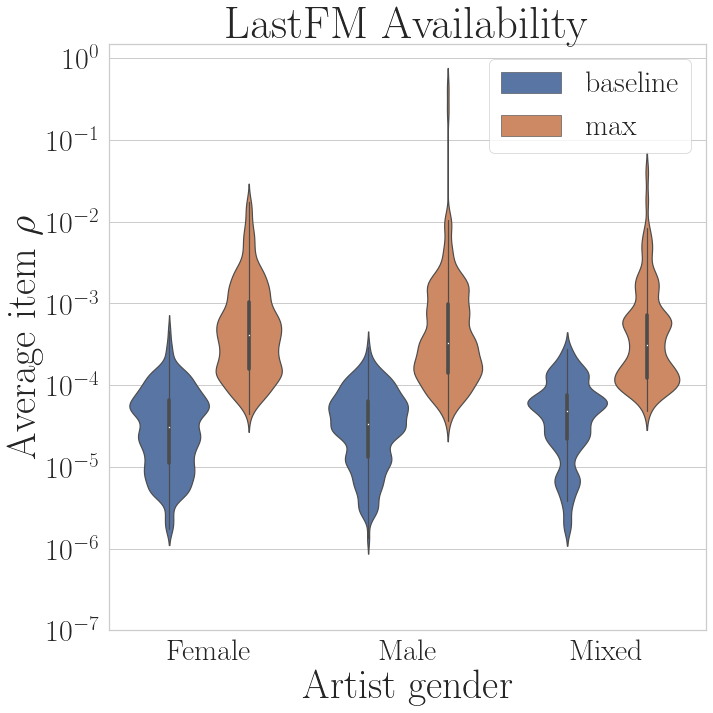

In [23]:
fig, axs = plt.subplots(1,1, figsize=(10,10), sharey=False)
with context:
    p1=plot_gender_availability_bias(lastfm_libfm_nextk_gender_availability_df, axs, title='LastFM Availability')
    axs.xaxis.label.set_size(LABEL_SIZE)
    axs.yaxis.label.set_size(LABEL_SIZE)
    for t in axs.get_xticklabels():
        t.set_fontsize(TICK_SIZE)
    for t in axs.get_yticklabels():
        t.set_fontsize(TICK_SIZE)

    plt.tight_layout()
    plt.show()

In [ ]:
# fig.savefig('lastfm_gender_access.pdf', dpi = 100)

## Availability of `LastFM` and `MIND` datasets: Popularity comparison

In [24]:
lastfm_libfm_nextk_availability_df = pd.read_csv(os.path.join('results','lastfm_libfm_nextk_availability.csv'))
mind_libfm_nextk_availability_df = pd.read_csv(os.path.join('results','mind_libfm_nextk_availability.csv'))

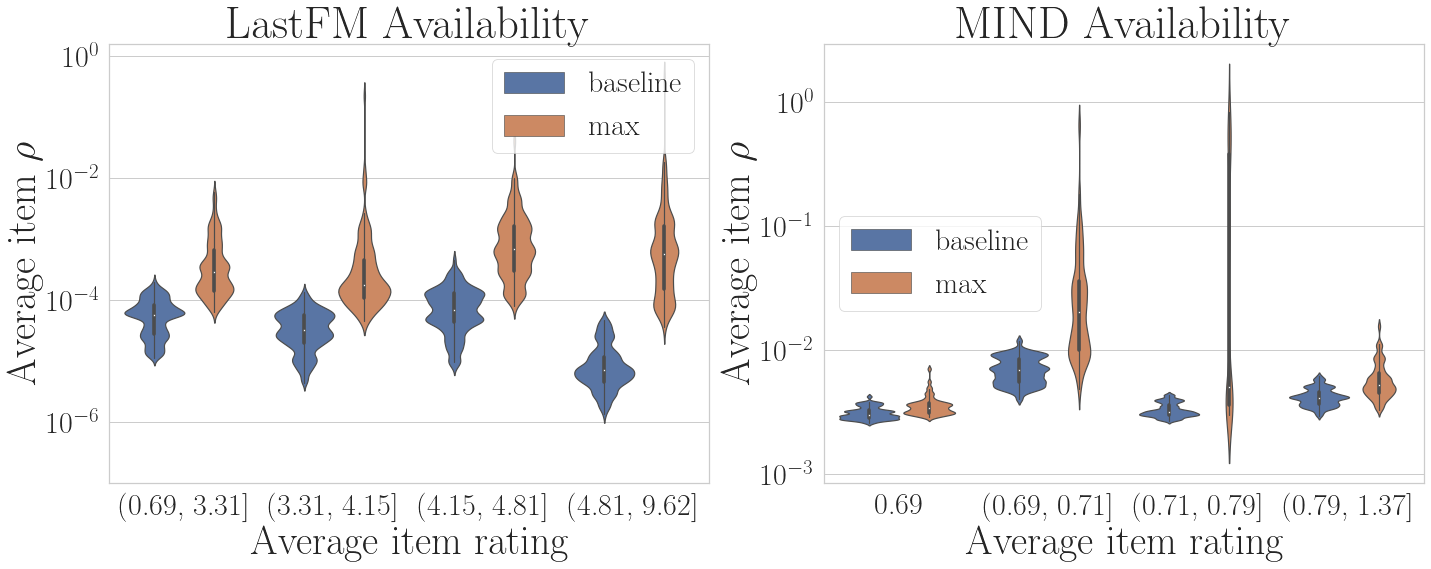

In [25]:
fig, axs = plt.subplots(1,2, figsize=(20,8), sharey=False)
with context:
    p1=plot_popularity_availability_bias(lastfm_libfm_nextk_availability_df, axs[0], title='LastFM Availability')
    p2=plot_popularity_availability_bias(mind_libfm_nextk_availability_df, axs[1], title='MIND Availability', ymin = -3)
    for i in [0,1]:
        axs[i].xaxis.label.set_size(LABEL_SIZE)
        axs[i].yaxis.label.set_size(LABEL_SIZE)
        for t in axs[i].get_xticklabels():   
            t.set_fontsize(TICK_SIZE)
        for t in axs[i].get_yticklabels(): 
            t.set_fontsize(TICK_SIZE)
    lastfm_labels = ['(0.69, 3.31]', '(3.31, 4.15]', '(4.15, 4.81]', '(4.81, 9.62]']
    mind_labels = ['0.69', '(0.69, 0.71]', '(0.71, 0.79]', '(0.79, 1.37]']
    p1.set_xticklabels(lastfm_labels)
    p2.set_xticklabels(mind_labels)
    plt.tight_layout()
    plt.show()

In [17]:
# fig.savefig('lastfm_mind_access.pdf', dpi = 100)